In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,NaN,-0.45161,NaN,1.00000,0.71216,NaN,NaN,0.00000,...,NaN,0.90695,NaN,1.00000,NaN,-0.20099,NaN,NaN,NaN,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,NaN,NaN,-0.16399,...,NaN,NaN,NaN,-0.53206,NaN,-0.62197,NaN,NaN,NaN,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	68
float64		column 4	0
float64		column 5	102
float64		column 6	0
float64		column 7	68
float64		column 8	70
float64		column 9	138
float64		column 10	34
float64		column 11	138
float64		column 12	36
float64		column 13	104
float64		column 14	0
float64		column 15	138
float64		column 16	34
float64		column 17	138
float64		column 18	0
float64		column 19	102
float64		column 20	0
float64		column 21	104
float64		column 22	70
float64		column 23	138
float64		column 24	0
float64		column 25	104
float64		column 26	70
float64		column 27	104
float64		column 28	0
float64		column 29	138
float64		column 30	68
float64		column 31	138
float64		column 32	104
float64		column 33	138
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,283.000000,351.000000,249.000000,351.000000,283.000000,281.000000,213.000000,317.000000,...,247.000000,281.000000,247.000000,351.000000,213.000000,283.000000,213.000000,247.000000,213.000000,351.000000
mean,0.891738,0.0,0.654468,0.044372,0.625072,0.115889,0.598084,0.142861,0.528580,0.184887,...,0.465713,-0.062409,0.589133,-0.069538,0.455063,-0.046004,0.434297,0.023441,0.428079,0.014480
std,0.311155,0.0,0.466272,0.441435,0.490504,0.460810,0.443957,0.506925,0.493483,0.479629,...,0.525141,0.496985,0.462384,0.550025,0.498269,0.490992,0.526925,0.492227,0.467874,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.476530,-0.064735,0.446810,-0.024795,0.308935,-0.036460,0.147060,-0.046220,...,0.060235,-0.290990,0.354945,-0.443165,0.078100,-0.226985,0.096110,-0.208215,0.000000,-0.165350
50%,1.000000,0.0,0.870480,0.016310,0.819270,0.022800,0.774860,0.016780,0.700000,0.023120,...,0.620250,-0.020990,0.739440,-0.017690,0.535500,0.000000,0.545450,0.000000,0.513820,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.976880,0.476190,0.945900,0.538190,...,0.915955,0.134120,0.982945,0.153535,0.885680,0.130740,0.877570,0.210855,0.835440,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

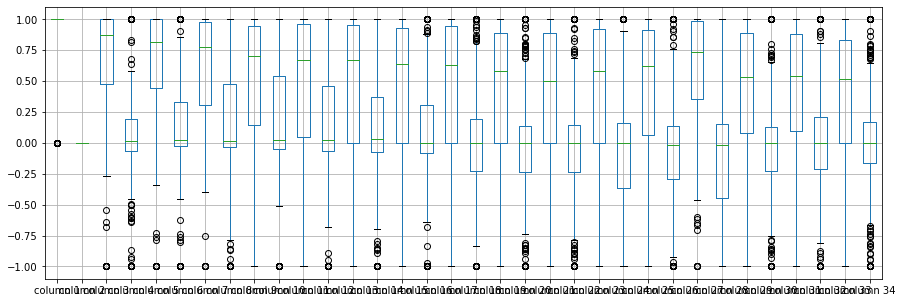

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.654468
column 4     0.044372
column 5     0.625072
column 6     0.115889
column 7     0.598084
column 8     0.142861
column 9     0.528580
column 10    0.184887
column 11    0.472356
column 12    0.144862
column 13    0.406662
column 14    0.093414
column 15    0.384091
column 16    0.065033
column 17    0.414831
column 18   -0.003617
column 19    0.394695
column 20   -0.024025
column 21    0.352307
column 22   -0.005469
column 23    0.424329
column 24   -0.057406
column 25    0.465713
column 26   -0.062409
column 27    0.589133
column 28   -0.069538
column 29    0.455063
column 30   -0.046004
column 31    0.434297
column 32    0.023441
column 33    0.428079
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.236972,-0.006529,0.119789,0.127606,0.153208,-0.006932,0.053879,-0.076009,...,-0.004391,0.083609,-0.191182,-0.010725,0.052248,-0.096154,0.074968,-0.162751,0.080897,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.236972,NaN,1.000000,0.031784,0.512179,0.094077,0.409269,0.062278,0.506389,0.078856,...,0.360702,-0.091398,0.224813,0.138092,0.485372,0.073593,0.246877,0.006789,0.349222,0.018160
column 4,-0.006529,NaN,0.031784,1.000000,-0.084937,-0.190308,-0.085012,0.247242,-0.360701,0.197166,...,-0.107799,-0.211904,-0.072730,0.000743,-0.092062,0.320385,-0.159476,-0.119453,-0.030727,0.034608
column 5,0.119789,NaN,0.512179,-0.084937,1.000000,0.134398,0.620208,-0.069359,0.516213,-0.093220,...,0.221485,-0.010424,0.282293,0.148151,0.287390,0.067987,0.483858,-0.025078,0.547721,-0.055847
column 6,0.127606,NaN,0.094077,-0.190308,0.134398,1.000000,-0.089740,0.336635,-0.171490,0.231005,...,-0.119963,0.033396,-0.134534,-0.068775,0.082989,-0.133671,-0.063069,0.328574,-0.021539,0.185215
column 7,0.153208,NaN,0.409269,-0.085012,0.620208,-0.089740,1.000000,-0.234048,0.530737,-0.135945,...,0.326078,0.076794,0.293083,0.079488,0.349198,0.023092,0.538510,-0.043213,0.682455,-0.143226
column 8,-0.006932,NaN,0.062278,0.247242,-0.069359,0.336635,-0.234048,1.000000,-0.362156,0.345932,...,-0.100980,-0.297400,-0.191178,-0.006172,0.063544,-0.058281,-0.179295,0.168791,-0.114867,0.426126
column 9,0.053879,NaN,0.506389,-0.360701,0.516213,-0.171490,0.530737,-0.362156,1.000000,-0.267087,...,0.447150,0.201635,0.322252,0.133923,0.423139,0.103692,0.366311,-0.112244,0.417768,-0.166616
column 10,-0.076009,NaN,0.078856,0.197166,-0.093220,0.231005,-0.135945,0.345932,-0.267087,1.000000,...,-0.130337,-0.124162,-0.168398,0.038670,-0.086416,-0.082656,-0.106604,-0.102323,-0.129847,0.077600


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [34,34+56,34+56+56,34+56+56+56,34+56+56+56+56,34+56+56+56,34+56+56,34+56,34], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.756619317190987
Epoch: 1 , loss: 15.947039831252326
Epoch: 2 , loss: 15.680147852216448
Epoch: 3 , loss: 15.672157605489096
Epoch: 4 , loss: 15.632869039263044
Epoch: 5 , loss: 15.545229457673573
Epoch: 6 , loss: 15.699425833565849
Epoch: 7 , loss: 15.426389103844052
Epoch: 8 , loss: 15.467498461405436
Epoch: 9 , loss: 15.239568801153274
Epoch: 10 , loss: 14.80969510759626
Epoch: 11 , loss: 14.011985324677967
Epoch: 12 , loss: 13.916048276992072
Epoch: 13 , loss: 13.698503948393322
Epoch: 14 , loss: 13.440689541044689
Epoch: 15 , loss: 13.62887700398763
Epoch: 16 , loss: 13.347767194112143
Epoch: 17 , loss: 13.644486381894065
Epoch: 18 , loss: 13.570356823149181
Epoch: 19 , loss: 13.59661206744966
Epoch: 20 , loss: 13.464920498075939
Epoch: 21 , loss: 13.236708777291435
Epoch: 22 , loss: 13.322491645812988
Epoch: 23 , loss: 13.400889442080544
Epoch: 24 , loss: 13.478999137878418
Epoch: 25 , loss: 13

In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Ionosphere_AW_20(imp).xlsx", index=False, header=False)